# Stylesheets in matplotlib
   
files needed = ('bea_gdp.csv', 'paper.mplstyle')

We have discussed what makes a visualization graphically excellent and we have seen the defaults usually do not cut it. 
   
A *stylesheet* modifies the default characteristics of our plots. This is beneficial in at least two ways.

1. We do not need to retype the same code each time we create a plot (we want to automate the boring stuff).
2. Our figures have consistent styling.   

**[This documentation](https://matplotlib.org/stable/users/explain/customizing.html) will be very useful!** 

*The solutions to the practice problems are at the end of the notebook.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp = pd.read_csv('bea_gdp.csv', index_col='year')
gdp.head()

gdp   cons    inv   exp   imp    gov   res
year                                                 
1929.0  1109.4  830.8  120.4  43.5  58.0  180.4 -20.9
1930.0  1015.1  786.3   82.0  36.0  50.5  198.7 -31.5
1931.0   950.0  761.8   53.3  29.9  44.0  206.8 -44.0
1932.0   827.5  693.6   19.7  23.4  36.5  200.2 -42.0
1933.0   817.3  678.3   26.6  23.6  38.1  193.8 -51.1

## The defaults

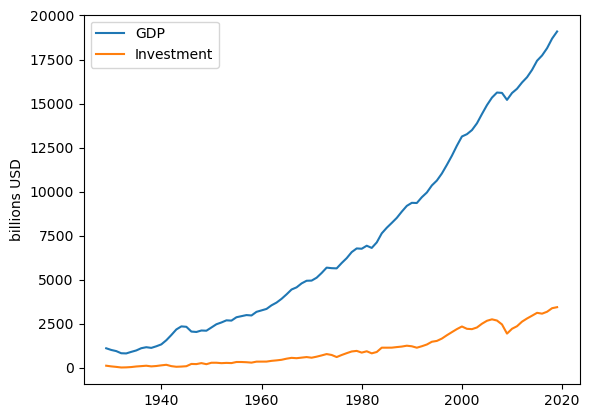

In [3]:
fig, ax = plt.subplots()

ax.plot(gdp.index, gdp['gdp'], label='GDP')
ax.plot(gdp.index, gdp['inv'], label='Investment')

ax.set_ylabel('billions USD')

ax.legend()

plt.show()

Lots not to like about this. 

* I don't want spines on the top and right
* I don't like these colors
* I don't like this figure size
* I don't want a box around the legend

Here is how I would fix this, coding it "by hand."

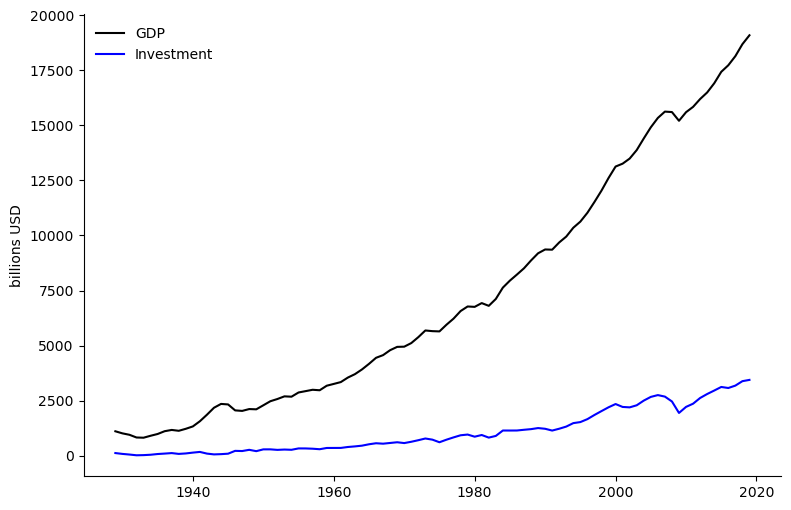

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(gdp.index, gdp['gdp'], label='GDP', color='black')
ax.plot(gdp.index, gdp['inv'], label='Investment', color='blue')

ax.set_ylabel('billions USD')

ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Okay, that looks better. But do I want to add all that code each time I make a plot? No. 

## Using a stylesheet

This is where a stylesheet helps. A stylesheet is a text file in which we specify characteristics we want in our plots. When we apply the stylesheet, it overrides the defaults with our new values. We are the bosses around here. 

In the cell below, I only want to apply the style to this figure, so I use the `with` command from python. The `with` command applies the style to the code that is indented below it. 

```python 
with plt.style.context('paper.mplstyle'):
```

The `with` statement is more general than this. It's purpose to automatically open and close the file 'paper.mplstyle'. Leaving a file stream open after you are through with it can cause problems. 

The code
```python
plt.style.context('paper.mplstyle')
```
tells matplotlib what style sheet to apply. Since "paper.mplstyle" is in my current working directory, I do not need to specify more of the path. If your stylesheet was in a different directory, you would need to provide the path to it. 


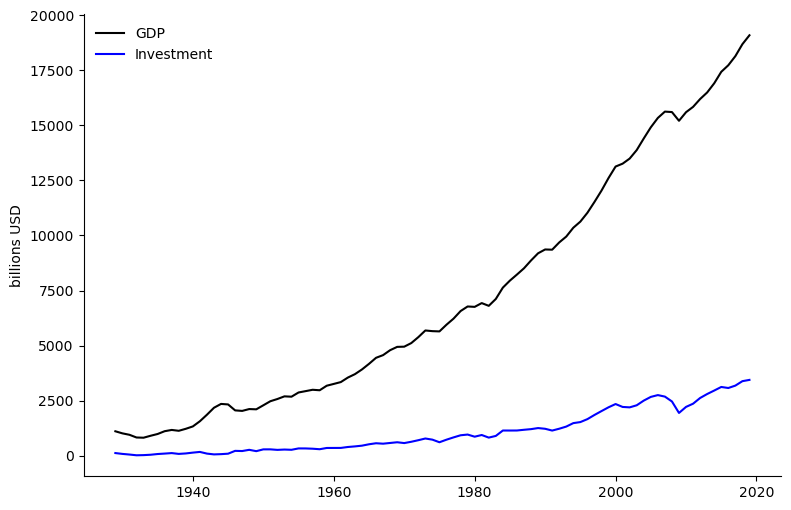

In [7]:
with plt.style.context('paper.mplstyle'):
    fig, ax = plt.subplots()
    
    ax.plot(gdp.index, gdp['gdp'], label='GDP')
    ax.plot(gdp.index, gdp['inv'], label='Investment')

    ax.set_ylabel('billions USD')
    ax.legend()
    
plt.show()

Nice. That is identical to the figure before it, but required much less code. 
 
Open the file "paper.mplstyle" file with a text editor. It's contents are 

```
axes.spines.right: False
axes.spines.top: False
axes.prop_cycle : cycler(color=['black','blue','red','orange'])
figure.figsize:9,6 
legend.frameon:False
```

* The first two lines turn off the spines. 
* The second line creates a `cycler`. Here I specify the order of colors to use. If I only have one line in a figure, I want it to be black. Color doesn't do me any good in a one-line figure. 
* The fourth line sets the figure size.
* The fifth line turns the frame off on the legend.

### Building a stylesheet

How did I know what to put in my stylesheet? I looked at the [documentation](https://matplotlib.org/stable/users/explain/customizing.html)! Scroll towards the bottom of the page until you come to "The default `matplotlibrc` file" section. The file is broken up into sections. Some parameters only apply to some kinds of plots. Others are more general.  

To create a file sheet, just create a text document and type in the parameters and their new values. I rename the file suffix to "mplstyle" so that I know what kind of file it is.

# Practice #1

The stylesheet we used above was named "paper" because it holds the defaults I would use in a paper. If I want to make a figure for a presentation, I want to make some changes. For figures in a slide, I want wider lines, bigger labels, and a different figure size. 

1. Create a new stylesheet named "slides.mplstyle"
2. Copy the contents of "paper.mplstyle" to the slides stylesheet
3. Modify the stylesheet so that: 
    1. The linewidth is 2.5
    2. The xtick labelsize is 14
    3. The ytick labelsize is 14
    4. The figuresize is 12,8
4. Run this code using your new stylesheet
 
```python
with plt.style.context('slides.mplstyle'):
    fig, ax = plt.subplots()
    
    ax.plot(gdp.index, gdp['gdp'], label='GDP')
    ax.plot(gdp.index, gdp['inv'], label='Investment')

    ax.set_ylabel('billions USD')
    ax.legend()
    
plt.show()
```

## Applying a stylesheet to the whole document

If we want all of our plots in a notebook to follow the style sheet, we use `plt.style.use()` function at the top of our notebook where we place our import statements. 

```python
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('slides.mplstyle')
```

Now we do not need to specify the `with ` statement each time we create a plot. 

## Reseting the style

Use `rcdefaults()` to reset the style to the default.

## Practice #2

My "paper" stylesheet has a problem. Papers are often printed in black and white, so I want to use line styles to make the lines easy to differentiate if printed in black and white. 

1. Add an entry to the paper stylesheet to cycle trhough the line styles: '-', '--', ':', '-.'.

2. Run this code using your modified stylesheet
 
```python
with plt.style.context('paper.mplstyle'):
    fig, ax = plt.subplots()
    
    ax.plot(gdp.index, gdp['gdp'], label='GDP')
    ax.plot(gdp.index, gdp['inv'], label='Investment')

    ax.set_ylabel('billions USD')
    ax.legend()
    
plt.show()
```

## Solutions to practice #1
I made a copy of paper.mplstyle and made the following changes before saving it as slides.mplstyle.

Add:

* `lines.linewidth: 2.5`
* `xtick.labelsize: 14`
* `ytick.labelsize: 14`

Modify:

* `figure.figsize:12,8`



## Solutions to practice #2

I modified the `axes.prop_cycle` entry to be: 

```python
axes.prop_cycle : cycler(color=['black','blue','red','orange']) + cycler(linestyle=['-', '--', ':', '-.'])
```